In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
os.chdir('../..')

In [3]:
adata = sc.read('data/gbmap/extended_gbmap.h5ad', cache = True)
adata

AnnData object with n_obs × n_vars = 1135677 × 26302
    obs: 'author', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'sector', 'celltype_original', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
   

In [24]:
cond = (adata.obs.stage.isin(["unknown", "Primary"])) & (adata.obs['is_primary_data'] == True)

In [25]:
bdata = adata[cond].copy()
bdata

AnnData object with n_obs × n_vars = 819910 × 26302
    obs: 'author', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'sector', 'celltype_original', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    

In [27]:
bdata.obs.author.value_counts()

author
Wang2021           154099
Abdelfattah2022    112954
Xie2021             97584
Couturier2020       64114
Richards2021        62443
Lee2021             61269
Ravi2022            41378
LeBlanc2022         34024
Pombo2021           27001
Johnson2020         23781
Wang2019            22720
Jacob2020           21227
Neftel2019          19030
Bhaduri2020         14934
Wang2020            12437
Yuan2018            12202
Wu2020              10211
Chen2021             9525
Goswami2019          5997
Zhao2020             5182
Yu2020               4693
Sankowski2019        2139
Friedrich2021         966
Name: count, dtype: int64

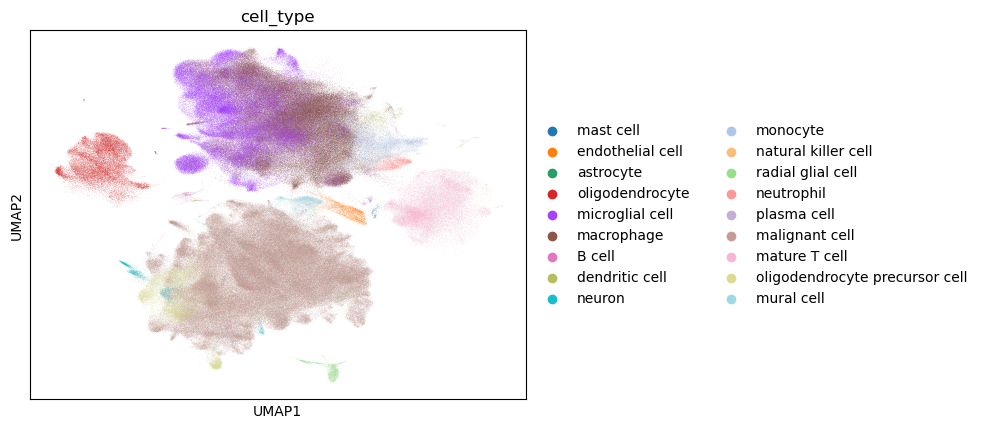

In [26]:
sc.pl.umap(bdata, color = 'cell_type')

In [28]:
bdata.write('output/extended_gbmap_filtered.h5ad')